# **Linhas, Circulos e Blob Detection**

#### **Iremos aprender:**
1. Houghlines - Transformada de Hough
2. Probabilistic Houghlines - Transformada de Hough Probabilística
3. Círculos Hough
4. Blob Detection

In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


## **Detecção de Linhas - Usando Hough Lines**

A Transformada de Hough é uma técnica usada em processamento de imagens e visão computacional para detectar linhas, círculos e outras formas geométricas em uma imagem, mesmo quando elas estão incompletas ou ruidosas. A grande vantagem da Transformada de Hough é sua robustez, pois pode detectar formas em imagens com interferências ou bordas descontínuas
   
A transformada de Hough usa um mapa de arestas binárias como entrada e tenta localizar arestas colocadas como linhas retas. A ideia da transformada de Hough é que cada ponto de aresta no mapa de arestas seja transformado em todas as linhas possíveis que poderiam passar por aquele ponto.

`cv2.HoughLines(binarized/thresholded image, 𝜌 accuracy, 𝜃 accuracy, threshold)`

- rho (𝜌 accuracy) - Resolução do acumulador em pixels (distância)
- theta (𝜃 accuracy) - Resolução do ângulo em radianos.
- Threshold aqui é o voto mínimo para que seja considerado uma linha




Valores para theta :

- 1º (𝜋/180) → bom equilíbrio entre precisão e eficiência.

- 0.5º (𝜋/360) → maior precisão para imagens complexas.

- 2º ou mais → mais rápido, mas menos preciso.


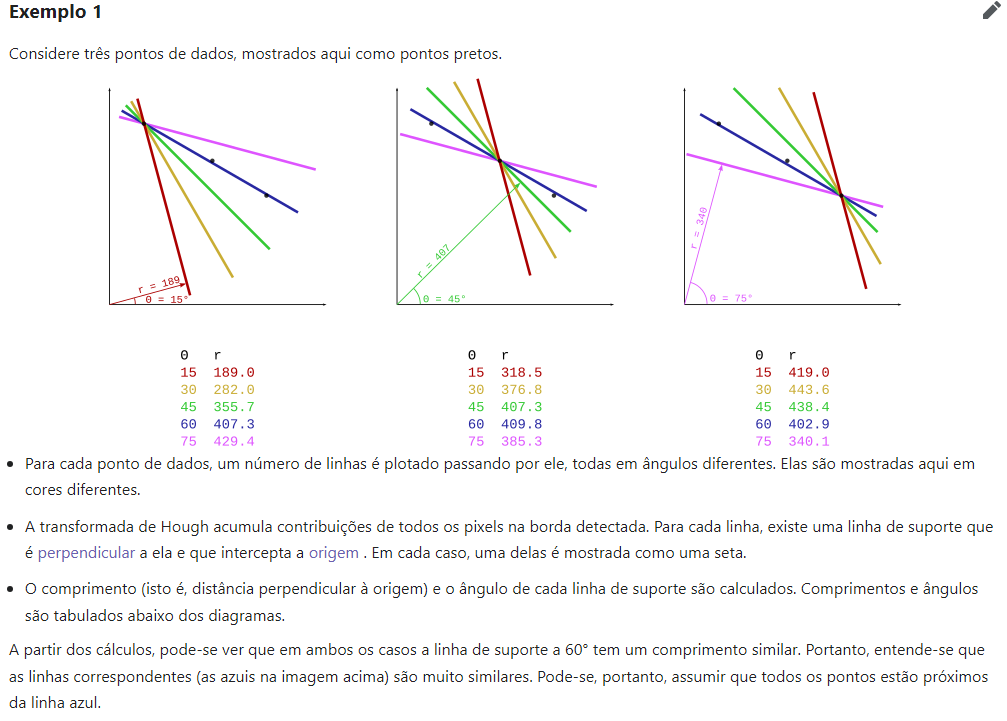


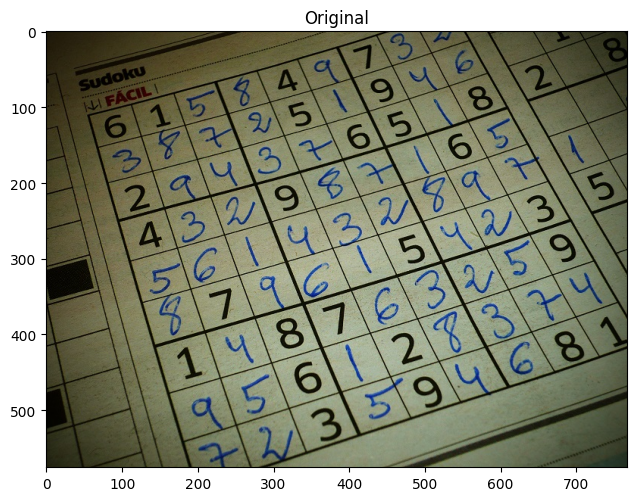

[4.        2.8797932]


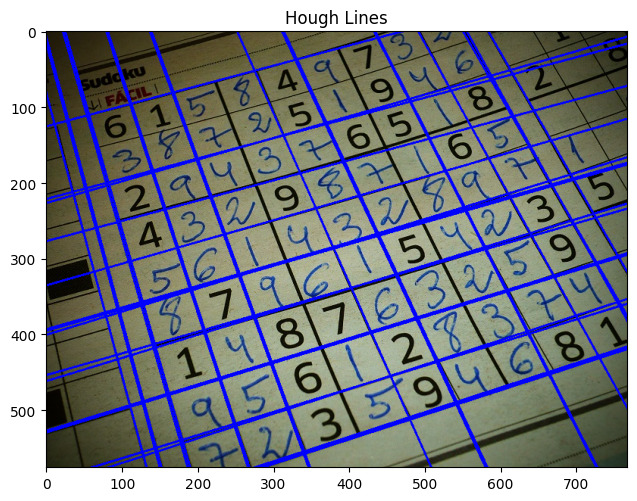

In [2]:
image = cv2.imread('images/soduku.jpg')
imshow('Original', image)

# Grayscale e Canny Edges extraidos
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

# HoughLines usando uma precisão rho de 1 pixel
# precisão teta de np.pi / 180 que é 1 grau
# Nosso limite de linha está definido como 240 (número de pontos na linha)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 240)

print(lines[0][0])

# Iteramos cada linha e a convertemos para o formato
# exigido por cv2.lines (ou seja, exigindo pontos finais)
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

imshow('Hough Lines', image)

## **Probabilistic Hough Lines**
Uma Transformada de Hough é considerada probabilística se usar amostragem aleatória dos pontos de borda. Esses algoritmos podem ser divididos com base em como mapeiam o espaço da imagem para o espaço de parâmetros.

A Transformada de Hough Probabilística (função cv2.HoughLinesP) é uma versão otimizada que retorna apenas os segmentos de linha em vez das linhas completas. Isso é mais eficiente, especialmente para imagens grandes.

```
cv2.HoughLinesP(binarized image, 𝜌 accuracy, 𝜃 accuracy, threshold, minimum line length, max line gap)
```





(63, 1, 4)


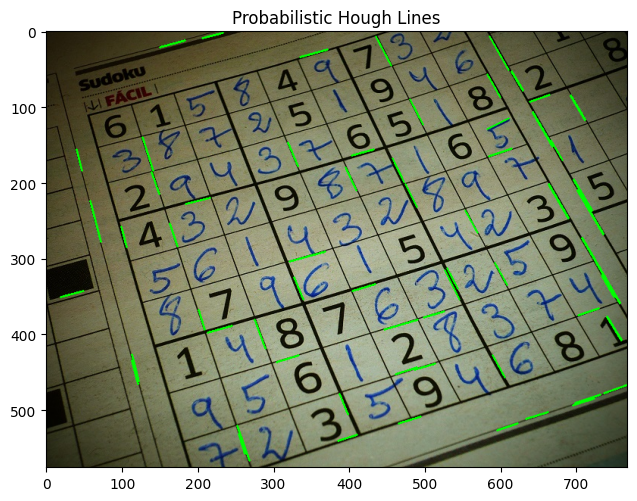

In [3]:
# Grayscale and Canny Edges extracted
image = cv2.imread('images/soduku.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

# Again we use the same rho and theta accuracies
# However, we specific a minimum vote (pts along line) of 100
# Especificamos também o tamanho minimo de uma linha (3 píxels) e o máximo de pixels que separam um fragmento de linha de outro (25 neste caso)
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, 3, 25)
print(lines.shape)

for x in range(0, len(lines)):
    for x1,y1,x2,y2 in lines[x]:
        cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)

imshow('Probabilistic Hough Lines', image)

## **Circle Detection - Hough Cirlces**

**cv2.HoughCircles**(image, method, dp, MinDist, param1, param2, minRadius, MaxRadius)


- Method - atualmente apenas cv2.HOUGH_GRADIENT disponível
- dp - Razão inversa da resolução do acumulador
- MinDist - a distância mínima entre o centro dos círculos detectados
- param1 - Valor do gradiente usado na detecção de bordas
- param2 - Limite do acumulador para o método HOUGH_GRADIENT (menor permite que mais círculos sejam detectados (falsos positivos))
- minRadius - limita o menor círculo a este tamanho (via raio)
- MaxRadius - da mesma forma, define o limite para os círculos maiores



In [ ]:
!wget https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Circles_Packed_In_Square_11.jpeg

--2021-11-15 19:31:09--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Circles_Packed_In_Square_11.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82585 (81K) [image/jpeg]
Saving to: ‘Circles_Packed_In_Square_11.jpeg’

Circles_Packed_In_S 100%[===================>]  80.65K  --.-KB/s    in 0.008s  

2021-11-15 19:31:09 (9.93 MB/s) - ‘Circles_Packed_In_Square_11.jpeg’ saved [82585/82585]



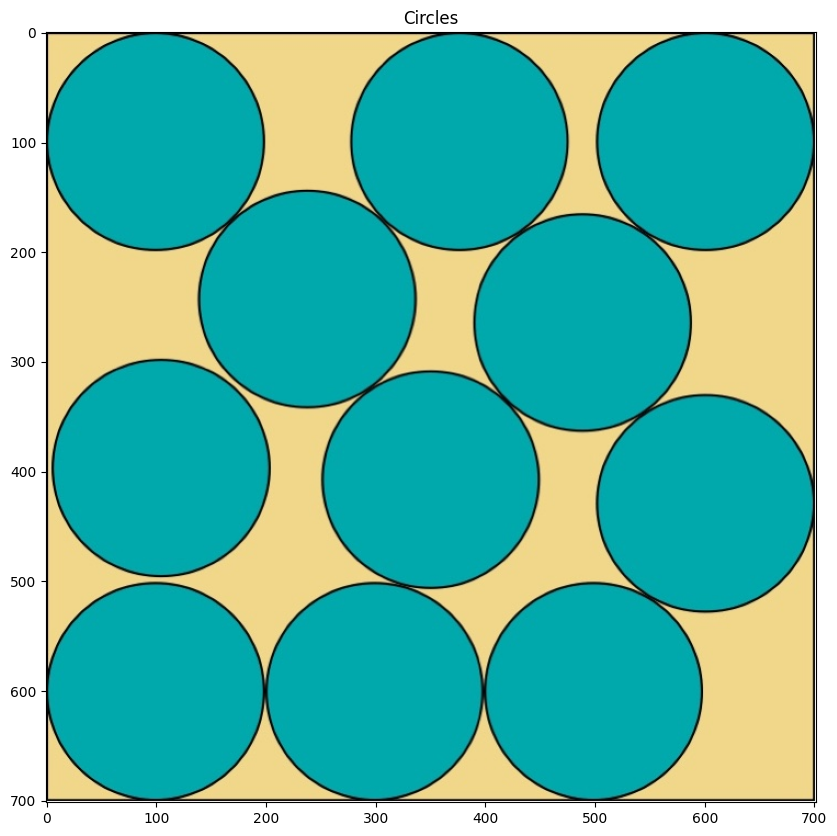

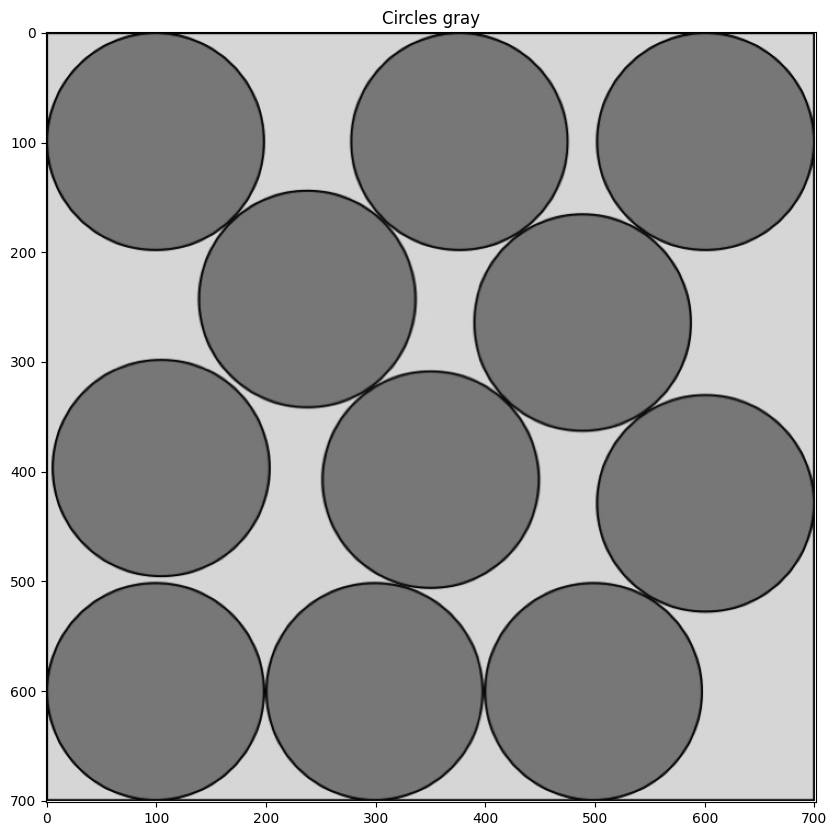

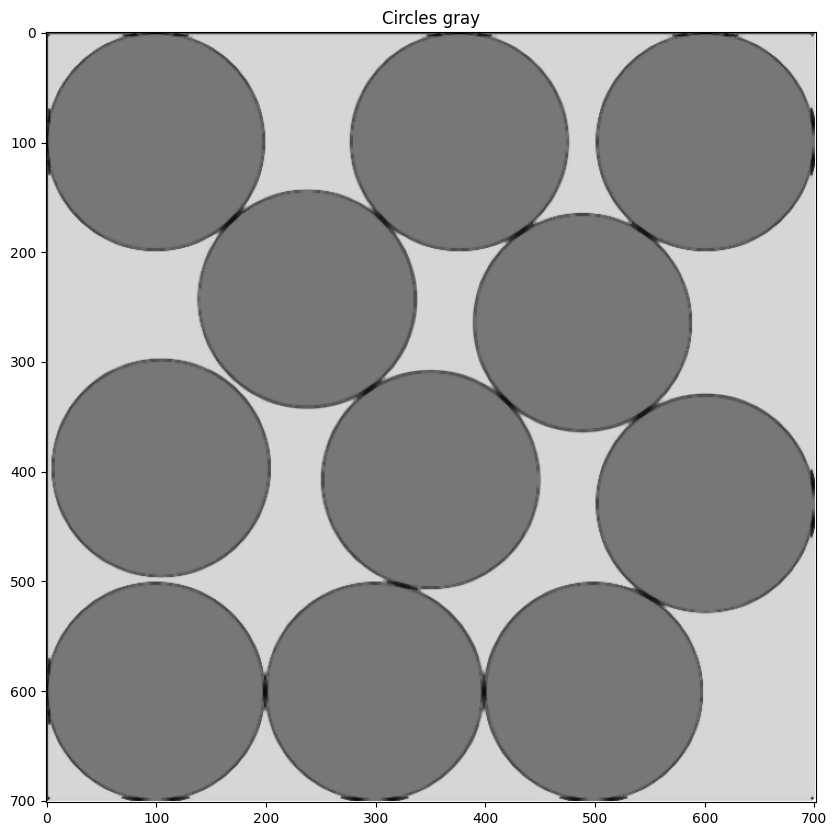

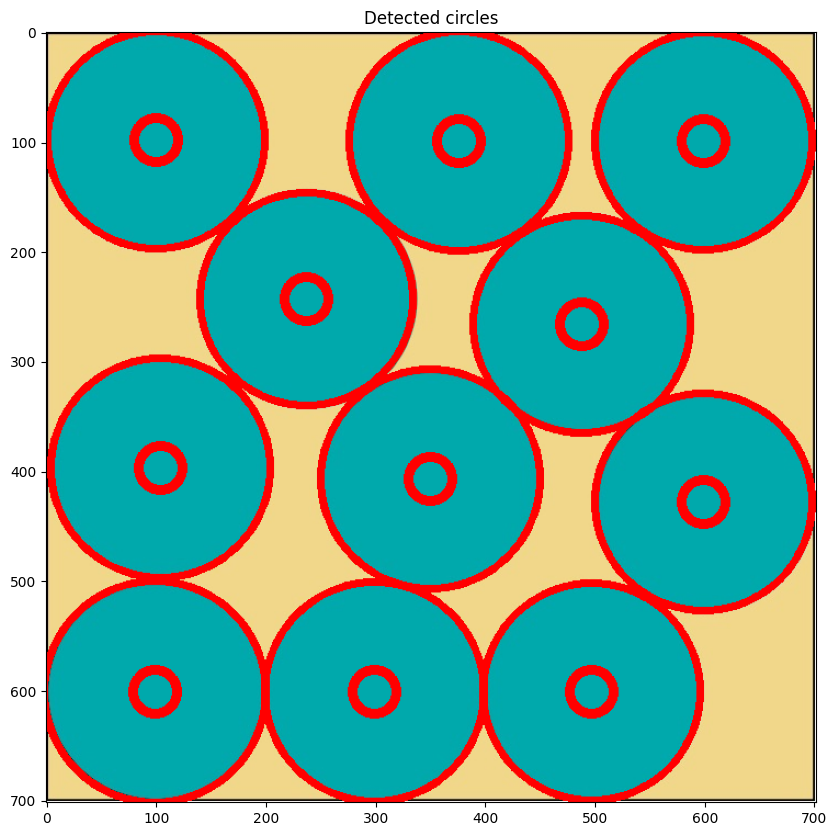

In [5]:
image = cv2.imread('images/Circles_Packed_In_Square_11.jpeg')
imshow('Circles', image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow('Circles gray', gray)
blur = cv2.medianBlur(gray, 5)
imshow('Circles gray', blur)

circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1.2, 25)

cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.2, 100)

circles = np.uint16(np.around(circles)) #Arredondamento dos valores decimais

for i in circles[0,:]:
    # Desenhando o circulo externo
    cv2.circle(image,(i[0], i[1]), i[2], (0, 0, 255), 5)
    
    # Desenhando o centro
    cv2.circle(image, (i[0], i[1]), 2, (0, 0, 255), 8)

imshow('Detected circles', image)

## **Blob Detection**

Blob é um termo usado para descrever uma região coesa (conjunto de pixels conectados) em uma imagem que compartilha características visuais semelhantes.
Pode representar objetos ou características de interesse, como círculos, manchas, áreas brilhantes ou escuras, e outros elementos.

The function **cv2.drawKeypoints** takes the following arguments:

**cv2.drawKeypoints**(input image, keypoints, blank_output_array, color, flags)

flags:
- cv2.DRAW_MATCHES_FLAGS_DEFAULT
- cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
- cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG
- cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS


Função SimpleBlobDetector faz:

- A imagem binarizada é processada para identificar componentes conectados.
Cada região conectada é um blob candidato.

- O SimpleBlobDetector aplica uma série de filtros configuráveis para validar os blobs candidatos:
    - Área, Filtra blobs com base no tamanho mínimo e máximo
    - Circularidade, Mede o quão próximo o blob é de um círculo perfeito.

        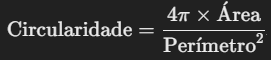

    - Convexidade, Mede a relação entre a área do blob e a área de seu envoltório convexo (Convex Hull)

    - Inércia, Avalia a distribuição de pixels no blob para determinar quão alongado ele é.

- Após aplicar todos os filtros, os blobs que atendem aos critérios são retidos como blobs válidos.

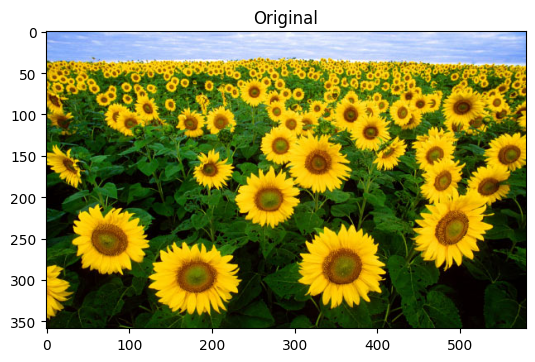

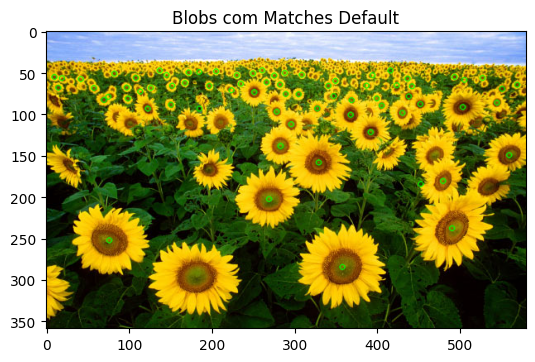

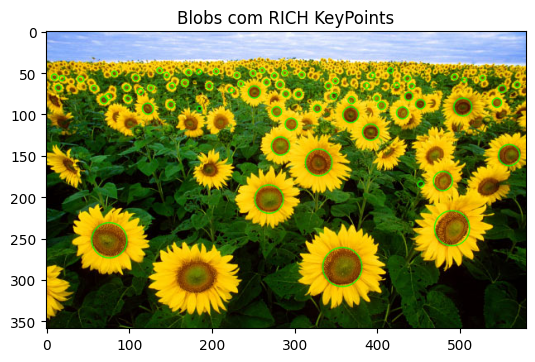

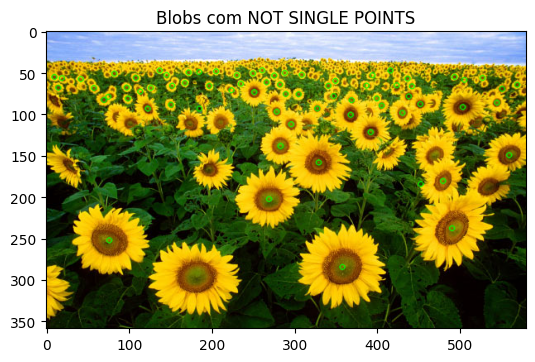

In [7]:
# Read image
image = cv2.imread("images/Sunflowers.jpg")
imshow("Original", image)

# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector.create()
 
# Detect blobs.
keypoints = detector.detect(image)
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of
# the circle corresponds to the size of blob
blank = np.zeros((1,1)) 
blobs = cv2.drawKeypoints(image, keypoints, 0, (0,255,0),
                                      cv2.DRAW_MATCHES_FLAGS_DEFAULT)
 
# Show keypoints
imshow("Blobs com Matches Default", blobs)

blobs = cv2.drawKeypoints(image, keypoints, blank, (0,255,0),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

imshow("Blobs com RICH KeyPoints", blobs)

blobs = cv2.drawKeypoints(image, keypoints, blank, (0,255,0),
                                      cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

imshow("Blobs com NOT SINGLE POINTS",blobs)